# Import libraries and read in csv file

In [1]:
#Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

#Read in csv file
df = pd.read_csv('NBA Players.csv')

#Check head
df.head()

,name,position,games,career_length,ppg,rpg,apg,per,fg,ft,...,all_stars,all_nba,all_defense,rookie_team,mvps,chips,roy,dpoys,scoring_champ,hof
0,Jerry West,SG,932,14,27.0,5.8,6.7,22.9,47.4,81.4,...,14,12,5,0,0,1,0,0,1,1
1,Dick Barnett,SG,971,14,15.8,2.9,2.8,14.7,45.6,76.1,...,1,0,0,0,0,2,0,0,0,1
2,Chauncey Billups,PG,1043,17,15.2,2.9,5.4,18.8,41.5,89.4,...,5,3,2,0,0,1,0,0,0,1
3,Vince Carter,SG,1541,22,16.7,4.3,3.1,18.6,43.5,79.8,...,8,2,0,1,0,0,1,0,0,1
4,Michael Cooper,SG,873,12,8.9,3.2,4.2,12.8,46.9,83.3,...,0,0,8,0,0,5,0,1,0,1


# Decision Tree

In [10]:
#Import decision tree
from sklearn.tree import DecisionTreeClassifier

In [8]:
#Prepare X and y
X = df.drop(columns=['name', 'position', 'hof']) #Explanatory variables
y = df['hof'] #Response variable

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

#Iniitialize model
dt = DecisionTreeClassifier(random_state=42)

#Fit on training data
dt.fit(X_train, y_train)

#Make predicitions
y_pred_tree = dt.predict(X_test)

#Get cross-validation score
scores = cross_val_score(dt, X, y, cv=5, scoring='accuracy')
scores_mean = scores.mean() * 100

#Display accuracy, cross val score, and classification report
accuracy = accuracy_score(y_test, y_pred_tree) * 100
print(f"Accuracy: {accuracy:.2f}%")
print(f"Best Cross-Validation Score: {scores_mean:.2f}%")
print('\nClassification Report: \n', classification_report(y_test, y_pred_tree))

Accuracy: 86.61%
Best Cross-Validation Score: 83.57%

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.89      0.90        74
           1       0.79      0.82      0.81        38

    accuracy                           0.87       112
   macro avg       0.85      0.85      0.85       112
weighted avg       0.87      0.87      0.87       112



# Random Forest

In [9]:
#Import random forest
from sklearn.ensemble import RandomForestClassifier

In [11]:
#Prepare X and y
X = df.drop(columns=['name', 'position', 'hof']) #Explanatory variables
y = df['hof'] #Response variable

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

#Iniitialize model
rf = RandomForestClassifier(random_state=42)

#Fit on training data
rf.fit(X_train, y_train)

#Make predicitions
y_pred_rf = rf.predict(X_test)

#Get cross-validation score
scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
scores_mean = scores.mean() * 100

#Display accuracy, cross val score, and classification report
accuracy = accuracy_score(y_test, y_pred_rf) * 100
print(f"Accuracy: {accuracy:.2f}%")
print(f"Best Cross-Validation Score: {scores_mean:.2f}%")
print('\nClassification Report: \n', classification_report(y_test, y_pred_rf))

Accuracy: 88.39%
Best Cross-Validation Score: 87.50%

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.92      0.91        74
           1       0.84      0.82      0.83        38

    accuracy                           0.88       112
   macro avg       0.87      0.87      0.87       112
weighted avg       0.88      0.88      0.88       112



# Gradient Boosting

In [2]:
#Import Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

In [14]:
#Prepare X and y
X = df.drop(columns=['name', 'position', 'hof']) #Explanatory variables
y = df['hof'] #Response

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

#Initialize model
gbc = GradientBoostingClassifier(random_state=42)

#Fit on training data
gbc.fit(X_train, y_train)

#Make predicitions
y_pred_gbc = gbc.predict(X_test)

#Get cross-validation score
scores = cross_val_score(gbc, X, y, cv=5, scoring='accuracy')
scores_mean = scores.mean() * 100

#Get accuracy
accuracy = accuracy_score(y_test, y_pred_gbc) * 100

#Display
print(f"Accuracy: {accuracy:.2f}%")
print(f"Cross-Validation Score: {scores_mean:.2f}%")
print('\n Classificaiton Report: \n', classification_report(y_test, y_pred_gbc))

Accuracy: 91.07%
Cross-Validation Score: 88.04%

 Classificaiton Report: 
               precision    recall  f1-score   support

           0       0.92      0.95      0.93        74
           1       0.89      0.84      0.86        38

    accuracy                           0.91       112
   macro avg       0.90      0.89      0.90       112
weighted avg       0.91      0.91      0.91       112



# XG Boost

In [19]:
#Import XG Boost
from xgboost import XGBClassifier

In [23]:
#Prepare X and y
X = df.drop(columns=['name', 'position', 'hof']) #Explanatory
y = df['hof'] #Reponse

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

#Initialize model
xgb = XGBClassifier(objective='binary:logistic')

#Fit on training data
xgb.fit(X_train, y_train)

#Make predicitinos
y_pred_xgb = xgb.predict(X_test)

#Get cross-validation score
scores = cross_val_score(xgb, X, y, cv=5, scoring='accuracy')
scores_mean = scores.mean() * 100

#Display accuracy, cross val scor and classification report
accuracy = accuracy_score(y_test, y_pred_xgb) * 100
print(f"Accuracy: {accuracy:.2f}%")
print(f"Cross Validation Score: {scores_mean:.2f}%")
print('\nClassification Report: \n', classification_report(y_test, y_pred_xgb))

Accuracy: 88.39%
Cross Validation Score: 86.79%

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.91      0.91        74
           1       0.82      0.84      0.83        38

    accuracy                           0.88       112
   macro avg       0.87      0.87      0.87       112
weighted avg       0.88      0.88      0.88       112



# Bagging Model

In [24]:
#Import bagging model
from sklearn.ensemble import BaggingClassifier

In [26]:
#Prepare X and y
X = df.drop(columns=['name', 'position', 'hof']) #Explanatory
y = df['hof'] #Response

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

#Initialize bagging model
bagging = BaggingClassifier(random_state=42)

#Fit on training data
bagging.fit(X_train, y_train)

#Make predicitions
y_pred_bag = bagging.predict(X_test)

#Get cross val score
scores = cross_val_score(bagging, X, y, cv=5, scoring='accuracy')
scores_mean = scores.mean() * 100

#Display accuracy, cross val score, and classification report
accuracy = accuracy_score(y_test, y_pred_bag) * 100
print(f"Accuracy: {accuracy:.2f}%")
print(f"Cross-Validation Score: {scores_mean:.2f}%")
print('\nClassification Report: \n', classification_report(y_test, y_pred_bag))

Accuracy: 88.39%
Cross-Validation Score: 86.61%

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.92      0.91        74
           1       0.84      0.82      0.83        38

    accuracy                           0.88       112
   macro avg       0.87      0.87      0.87       112
weighted avg       0.88      0.88      0.88       112



# K Nearest Neighbors

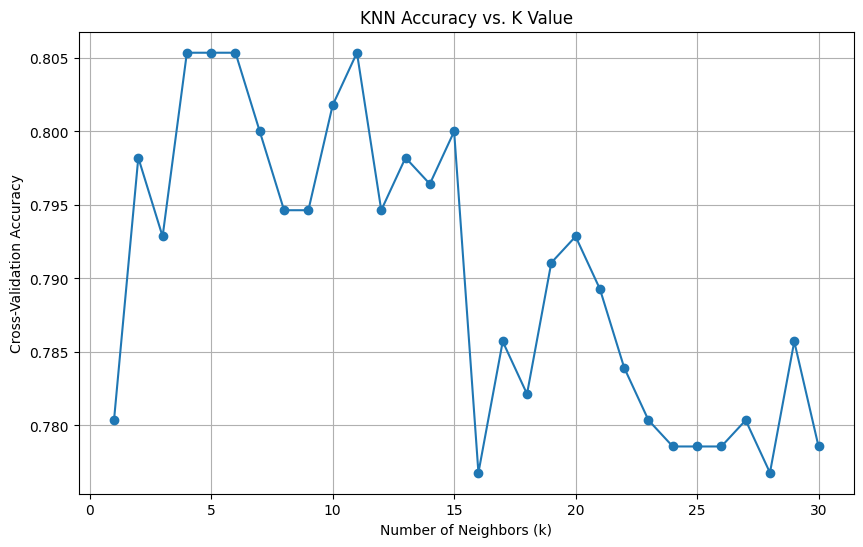

Best k: 4 with CV Accuracy: 80.54%


In [34]:
#Import KNN and matplotlib
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

#Get cross validation score for different values of K
k_range = range(1, 31)
cv_scores = []

#Iterate through different values of K
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

#Plot to visualize the best k
plt.figure(figsize=(10,6))
plt.plot(k_range, cv_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('KNN Accuracy vs. K Value')
plt.grid()
plt.show()

#Best k
best_k = k_range[cv_scores.index(max(cv_scores))]
print(f"Best k: {best_k} with CV Accuracy: {max(cv_scores)*100:.2f}%")


## Scale Features

In [4]:
#Import min-max scaler
from sklearn.preprocessing import MinMaxScaler

#Prepare X and y
X = df.drop(columns=['name', 'position', 'hof']) #Explanatory
y = df['hof'] #Response

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

#Initialize scaler
scaler = MinMaxScaler()

#Scale features
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)

In [36]:
#Initialze KNN model
knn = KNeighborsClassifier(n_neighbors=4)

#Fit on training data
knn.fit(X_train_scale, y_train)

#Make predicitions
y_pred_k = knn.predict(X_test_scale)

#Get cross-validation score
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
scores_mean = scores.mean() * 100

#Display accuracy, cross val score and classification report
accuracy = accuracy_score(y_test, y_pred_k) * 100
print(f"Accuracy: {accuracy:.2f}%")
print(f"Cross Validation Score: {scores_mean:.2f}%")
print('\nClassification Report: \n', classification_report(y_test, y_pred_k))

Accuracy: 87.50%
Cross Validation Score: 80.54%

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.95      0.91        74
           1       0.88      0.74      0.80        38

    accuracy                           0.88       112
   macro avg       0.88      0.84      0.85       112
weighted avg       0.88      0.88      0.87       112



# SVM

In [2]:
#Import support vector classifier
from sklearn.svm import SVC

In [9]:
#Initialize model
svm = SVC(random_state=42)

#Fit on training data
svm.fit(X_train_scale, y_train)

#Make predicitons
y_pred_svm = svm.predict(X_test_scale)

#Get cross-validation score
scores = cross_val_score(svm, X, y, cv=5, scoring='accuracy')
scores_mean = scores.mean() * 100

#Display accuracy, cross-validatio score, and classification report
accuracy = accuracy_score(y_test, y_pred_svm) * 100
print(f"Accuracy: {accuracy:.2f}%")
print(f"Cross-Validation Score: {scores_mean:.2f}%")
print(f'\nClasification Report: \n', classification_report(y_test, y_pred_svm))

Accuracy: 86.61%
Cross-Validation Score: 76.25%

Clasification Report: 
               precision    recall  f1-score   support

           0       0.92      0.88      0.90        74
           1       0.78      0.84      0.81        38

    accuracy                           0.87       112
   macro avg       0.85      0.86      0.85       112
weighted avg       0.87      0.87      0.87       112



# Logisitic Regression

In [22]:
#Read in dataframe with normalized features
df_normalized = pd.read_csv("NBA Players Normalized Stats.csv")

#Drop null values from normalized stats
df_normalized.dropna(inplace=True)

#Scale all numerical features
from sklearn.preprocessing import MinMaxScaler

#Initialize scaler
scaler = MinMaxScaler()

#Prepare X and y
X2 = df_normalized.drop(columns=['name', 'position', 'hof']) #Explanatory
y2 = df_normalized['hof'] #Response

#Train-test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, train_size=0.8, random_state=42)

#Scale features
X_train_scale2 = scaler.fit_transform(X_train2)
X_test_scale2 = scaler.fit_transform(X_test2)

In [17]:
#Import logisitic regression
from sklearn.linear_model import LogisticRegression

#Initialize model
logreg = LogisticRegression(random_state=42, max_iter=10000)

#Fit on training data
logreg.fit(X_train_scale2, y_train2)

#Make predicitions
y_pred_log = logreg.predict(X_test_scale2)

#Get cross-validation score
scores = cross_val_score(logreg, X2, y2, cv=5, scoring='accuracy')
scores_mean = scores.mean() * 100

#Display metrics
accuracy = accuracy_score(y_test2, y_pred_log) * 100
print(f"Accuracy: {accuracy:.2f}%")
print(f"Cross-Validation Score: {scores_mean:.2f}%")
print('\nClassification Report: \n', classification_report(y_test2, y_pred_log))

Accuracy: 91.07%
Cross-Validation Score: 86.04%

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93        74
           1       0.85      0.89      0.87        38

    accuracy                           0.91       112
   macro avg       0.90      0.91      0.90       112
weighted avg       0.91      0.91      0.91       112



# Naive Bayes

In [14]:
#Import gussian naive bayes
from sklearn.naive_bayes import GaussianNB

In [16]:
#Initialize model
gnb = GaussianNB()

#Fit on training data
gnb.fit(X_train_scale2, y_train2)

#Make predicitions
y_pred_gnb = gnb.predict(X_test_scale2)

#Get cross-validation score
scores = cross_val_score(gnb, X2, y2, cv=5, scoring='accuracy')
scores_mean = scores.mean() * 100

#Display metrics
accuracy = accuracy_score(y_test2, y_pred_gnb) * 100
print(f"Accuracy: {accuracy:.2f}%")
print(f"Cross-Validation Score: {scores_mean:.2f}%")
print('\nClasification Report: \n', classification_report(y_test2, y_pred_gnb))

Accuracy: 90.18%
Cross-Validation Score: 83.71%

Clasification Report: 
               precision    recall  f1-score   support

           0       0.93      0.92      0.93        74
           1       0.85      0.87      0.86        38

    accuracy                           0.90       112
   macro avg       0.89      0.89      0.89       112
weighted avg       0.90      0.90      0.90       112



# Model Performance Summary

In [7]:
#Make a dataframe of the model performance metrics for each model (class 1: HOFers)
summary = pd.DataFrame({
    'Accuracy': [86.61, 88.39, 91.07, 88.39, 88.39, 87.5, 86.61, 91.07, 90.18],
    'Cross-Val': [83.57, 87.5, 88.04, 86.79, 86.61, 80.54, 76.25, 86.04, 83.71],
    'Precision': [79, 84, 89, 82, 84, 88, 78, 85, 85],
    'Recall': [82, 82, 84, 84, 82, 74, 84, 89, 87],
    'F1-Score': [81, 83, 86, 83, 83, 80, 81, 87, 86],
}, index=['Decision Tree', 'Random Forest', 'Gradient Boosting', 'XG Boost', 'Bagging', 'K-NN', 'SVM', 'Logisitic Regression', 
          'Gussian Naive Bayes'])

#Add styles
summary = summary.style.format({
    'Accuracy': "{}%",
    'Cross-Val': "{}%",
    'Precision': "{}%",
    'Recall': "{}%",
    'F1-Score': "{}%"
})

#Define a function to highlight the minimum and maximum metrics
import numpy as np #Import numpy
def highlight_max(x, props='color:white;background-color: green; font-weight:bold;'):
    return np.where(x == np.nanmax(x.values), props, '')
def highlight_min(x, props='color:white;background-color: red; font-weight:bold;'):
    return np.where(x==np.nanmin(x.values), props, '')

#Apply to dataframe
summary = summary.apply(highlight_max)
summary = summary.apply(highlight_min)

#Display
print("Baseline Model Performance Summary: ")
display(summary)


Baseline Model Performance Summary: 


,Accuracy,Cross-Val,Precision,Recall,F1-Score
Decision Tree,86.61%,83.57%,79%,82%,81%
Random Forest,88.39%,87.5%,84%,82%,83%
Gradient Boosting,91.07%,88.04%,89%,84%,86%
XG Boost,88.39%,86.79%,82%,84%,83%
Bagging,88.39%,86.61%,84%,82%,83%
K-NN,87.5%,80.54%,88%,74%,80%
SVM,86.61%,76.25%,78%,84%,81%
Logisitic Regression,91.07%,86.04%,85%,89%,87%
Gussian Naive Bayes,90.18%,83.71%,85%,87%,86%


# Best Baseline Model's

**1. Gradient Boosting**

- This model achieved the highest cross-validation score and excellent overall performance in terms of accuracy and precision. It's particularly strong at reducing false positives—players who are predicted to make the Hall of Fame but actually aren’t strong candidates. That means it's cautious about who it "lets in," which is valuable when trying to maintain the integrity of HOF predictions.

- Given its high generalization, this model is likely to perform best on unseen data, such as predicting the HOF chances of current NBA veterans like LeBron James, Kevin Durant, or Stephen Curry. This makes it one of the most reliable models for real-world application.

**2. Logisitic Regression**

- Logistic Regression had the highest recall and F1-score among the models. It excels at reducing false negatives, meaning it does well at not overlooking players who truly deserve to make the Hall of Fame.

- Its strong F1-score shows a solid balance between precision and recall, which is important in datasets with class imbalance—like this one, where far more players do not make the Hall of Fame than those who do.

- Despite the potential limitations of logistic regression (e.g., assumptions of linearity), the model performs well—especially if the features are further normalized or transformed. It's a strong, interpretable choice.

**3. Gussian Naive Bayes**

- Naive Bayes delivered strong results across all key metrics, despite its known limitations. It assumes feature independence and normal distribution, which may not fully hold in this dataset, slightly limiting its potential.

- However, its speed, simplicity, and consistent accuracy, precision, and recall make it a surprisingly good baseline or backup model. It's also more interpretable than many complex models.

**Top Models**

My top models are Gradient Boosting and Logistic Regression. Gradient Boosting stands out for its real-world applicability and strong generalization performance, while Logistic Regression is valuable for its interpretability and solid performance despite class imbalance. Moving forward, I’ll focus on improving these two models to maximize both predictive power and explainability.

# Gradient Boosting Hyperparameter Tuning

## Random Search

In [16]:
#Import Random Search CV
from sklearn.model_selection import RandomizedSearchCV

#Prepare X and y
X = df.drop(columns=['name', 'position', 'hof']) #Explanatory variables
y = df['hof'] #Response

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

#Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth' : [None, 3, 5],
    'min_samples_split' : [2, 4, 6],
    'min_samples_leaf': [1, 3, 5],
    'max_features': [None, 'sqrt', 'log2']
}

#Initialize model
gbc = GradientBoostingClassifier()

#Initialize RandomSearchCV
random_search = RandomizedSearchCV(estimator=gbc, param_distributions=param_grid, n_iter=25, cv=5, random_state=42)

#Fit grid on training data
random_search.fit(X_train, y_train)

#Get best parameters and best model
best_params = random_search.best_params_
best_gbc = random_search.best_estimator_

#Make predicitions
y_pred_gbc = best_gbc.predict(X_test)


#Get accuracy and cross-validation score
accuracy = accuracy_score(y_test, y_pred_gbc) * 100
cross_val = random_search.best_score_ * 100

#Display
print("Best Hyperparameters: ", best_params)
print(f"Accuracy: {accuracy:.2f}%")
print(f"Cross-Validation Score: {cross_val:.2f}%")
print('\n Classificaiton Report: \n', classification_report(y_test, y_pred_gbc))

Best Hyperparameters:  {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'learning_rate': 0.1}
Accuracy: 90.18%
Cross-Validation Score: 92.62%

 Classificaiton Report: 
               precision    recall  f1-score   support

           0       0.92      0.93      0.93        74
           1       0.86      0.84      0.85        38

    accuracy                           0.90       112
   macro avg       0.89      0.89      0.89       112
weighted avg       0.90      0.90      0.90       112



## Grid Search

**Note:** For some reason on my random search when I didn't specify `scoring`, I got a better overall model performance. This effect didn't follow for GridSearchCV though. 

In [ ]:
#Import Random Search CV
from sklearn.model_selection import GridSearchCV

#Prepare X and y
X = df.drop(columns=['name', 'position', 'hof']) #Explanatory variables
y = df['hof'] #Response

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

#Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth' : [None, 3, 5],
    'min_samples_split' : [2, 4, 6],
    'min_samples_leaf': [1, 3, 5],
    'max_features': [None, 'sqrt', 'log2']
}

#Initialize model
gbc = GradientBoostingClassifier()

#Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5, scoring='accuracy')

#Fit grid on training data
random_search.fit(X_train, y_train)

#Get best parameters and best model
best_params = random_search.best_params_
best_gbc2 = random_search.best_estimator_

#Make predicitions
y_pred_gbc = best_gbc2.predict(X_test)


#Get accuracy and cross-validation score
accuracy = accuracy_score(y_test, y_pred_gbc) * 100
cross_val = random_search.best_score_ * 100

#Display
print("Best Hyperparameters: ", best_params)
print(f"Accuracy: {accuracy:.2f}%")
print(f"Cross-Validation Score: {cross_val:.2f}%")
print('\n Classificaiton Report: \n', classification_report(y_test, y_pred_gbc))

Best Hyperparameters:  {'n_estimators': 300, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'learning_rate': 0.05}
Accuracy: 89.29%
Cross-Validation Score: 92.62%

 Classificaiton Report: 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        74
           1       0.84      0.84      0.84        38

    accuracy                           0.89       112
   macro avg       0.88      0.88      0.88       112
weighted avg       0.89      0.89      0.89       112



## Optuna

In [62]:
#Import optuna
import optuna

#Prepare X and y
X = df.drop(columns=['name', 'position', 'hof'])  #Explanatory Variables
y = df['hof']  #Response

#Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

#Define the objective function for optuna
def objective(trial):
    #Define hyperparameters to tune
    param_space = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),  #Suggests an integer from 100 to 500
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),  #Suggest a float from 0.01 to 0.1
        'max_depth': trial.suggest_int('max_depth', 3, 10),  #Suggests an integer from 3 to 10
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),  #Suggest an integer from 2 to 10
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),  #Suggest an integer from 1 to 10
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None])  #Suggest categorical values
    }

    #Initialize model with suggested hyperparameters
    gbc = GradientBoostingClassifier(**param_space)

    #Perform cross-validation on the training data (X_train, y_train)
    scores = cross_val_score(gbc, X_train, y_train, cv=5, scoring='accuracy')
    scores_mean = scores.mean()  #Average cross-validation score

    #Fit the model on the training data
    gbc.fit(X_train, y_train)

    #Make predictions on the test set
    y_pred_gbc = gbc.predict(X_test)

    # Get accuracy on the test set
    accuracy = accuracy_score(y_test, y_pred_gbc)

    #We return the mean of the cross-validation score (you could also combine accuracy with CV score if you like)
    return accuracy 

#Create an Optuna study and optimize the function
study = optuna.create_study(direction='maximize')  #Maximize accuracy
study.optimize(objective, n_trials=50)  #50 trials to run

#Get best parameters from the study
best_params = study.best_params
print(f"Best Hyperparameters: {best_params}")

#Put best parameters into the model
best_gbc4 = GradientBoostingClassifier(**best_params)

#Fit the model on the training data
best_gbc4.fit(X_train, y_train)

#Make predictions on the test set
y_pred_gbc = best_gbc4.predict(X_test)

#Calculate final accuracy
final_accuracy = accuracy_score(y_test, y_pred_gbc) * 100 

#Calculate final cross-validation score (on training set)
final_cross_val = cross_val_score(best_gbc4, X_train, y_train, cv=5, scoring='accuracy')
final_cross_mean = final_cross_val.mean() * 100  # Mean of cross-validation scores

#Display results
print(f"Final Accuracy: {final_accuracy:.2f}%")
print(f"Final Cross-Validation Score: {final_cross_mean:.2f}%")
print('\nClassification Report:\n', classification_report(y_test, y_pred_gbc))


[I 2025-04-22 13:19:26,447] A new study created in memory with name: no-name-beb30ca7-0b7b-4a32-8d88-2eff0aa97b47
[I 2025-04-22 13:19:31,587] Trial 0 finished with value: 0.8928571428571429 and parameters: {'n_estimators': 363, 'learning_rate': 0.051919458679765995, 'max_depth': 6, 'min_samples_split': 6, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 0 with value: 0.8928571428571429.
[I 2025-04-22 13:19:38,010] Trial 1 finished with value: 0.8839285714285714 and parameters: {'n_estimators': 332, 'learning_rate': 0.03404593193847912, 'max_depth': 7, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 0 with value: 0.8928571428571429.
[I 2025-04-22 13:19:40,709] Trial 2 finished with value: 0.875 and parameters: {'n_estimators': 125, 'learning_rate': 0.050798518017320264, 'max_depth': 9, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 0 with value: 0.8928571428571429.
[I 2025-04-22 13:19:47,920] Trial

Best Hyperparameters: {'n_estimators': 389, 'learning_rate': 0.04841294453830717, 'max_depth': 6, 'min_samples_split': 6, 'min_samples_leaf': 10, 'max_features': None}
Final Accuracy: 91.07%
Final Cross-Validation Score: 92.17%

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93        74
           1       0.89      0.84      0.86        38

    accuracy                           0.91       112
   macro avg       0.90      0.89      0.90       112
weighted avg       0.91      0.91      0.91       112



**Seems we have a best model**

**Optuna Documentation:** https://www.geeksforgeeks.org/how-to-tune-hyperparameters-in-gradient-boosting-algorithm/

# Logisitic Regression Hyperparameter Tuning

In [24]:
#Import logisitic regression and gridsearchcv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#Define a parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100], 
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'max_iter': [5000, 10000, 15000]
}

#Initialize model
logreg = LogisticRegression()

#Initialize gridsearch
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy')

#Fit on training data
grid_search.fit(X_train_scale2, y_train2)

#Get best parameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

#Put best parameters on logreg
best_logreg = grid_search.best_estimator_

#Make predicitions
y_pred_log = best_logreg.predict(X_test_scale2)

#Display result
accuracy = accuracy_score(y_test2, y_pred_log) * 100
scores_mean = grid_search.best_score_ * 100
print(f"Accuracy: {accuracy:.2f}%")
print(f"Cross-Validation Score: {scores_mean:.2f}%")
print('\nClassification Report: \n', classification_report(y_test2, y_pred_log))

Best Hyperparameters: {'C': 1, 'max_iter': 5000, 'solver': 'liblinear'}
Accuracy: 90.18%
Cross-Validation Score: 89.21%

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.91      0.92        74
           1       0.83      0.89      0.86        38

    accuracy                           0.90       112
   macro avg       0.89      0.90      0.89       112
weighted avg       0.90      0.90      0.90       112



# Analyze Feature Importances from Gradient Boost Optuna Model

In [27]:
#Import data viz libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
#Extract feature importances from best_gbc3 which is my gradient boosting optuna model
importances = best_gbc4.feature_importances_

#Make a dataframe of the features and their importances

#First get feature names
features = X_train.columns

#Now make a dataframe
feature_importances = pd.DataFrame({
    'Feature': features,
    'Importances': importances
})

#Get percentages
feature_importances['Importances'] = round(feature_importances['Importances'] * 100, 2)

#Sort by descending order
feature_importances.sort_values(by='Importances', ascending=False)

,Feature,Importances
9,all_stars,66.36
6,fg,6.58
2,ppg,6.05
8,win_shares,5.54
14,chips,4.25
4,apg,2.25
5,per,1.97
0,games,1.75
3,rpg,1.74
10,all_nba,1.21


C:\Users\KRAyu\AppData\Local\Temp\ipykernel_40324\787444804.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x='Importances', y='Feature', data=plot_features, palette='twilight_shifted')


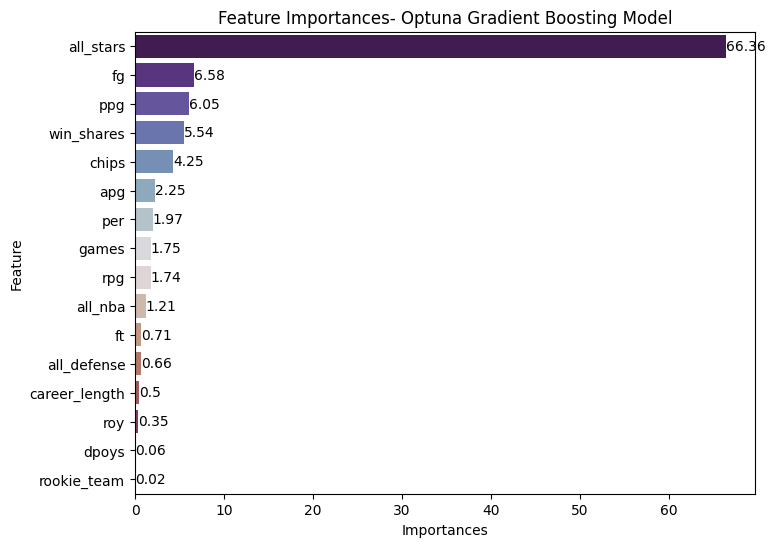

In [64]:
#Visualize result
plot_features = feature_importances[feature_importances['Importances'] > 0] #Subset to remove features with no importance
plot_features = plot_features.sort_values(by='Importances', ascending=False)
plt.figure(figsize=(8,6)) #Figure size
plot = sns.barplot(x='Importances', y='Feature', data=plot_features, palette='twilight_shifted')

#Annotate
plt.title('Feature Importances- Optuna Gradient Boosting Model')
for i in plot.containers:
    plot.bar_label(i, )
#Display
plt.show()

# Logit Summary

In [56]:
#Import statsmodel
import statsmodels.api as sm

#Add constant to X
X_train = sm.add_constant(X_train)
model = sm.Logit(y_train, X_train).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.182187
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    hof   No. Observations:                  448
Model:                          Logit   Df Residuals:                      429
Method:                           MLE   Df Model:                           18
Date:                Tue, 22 Apr 2025   Pseudo R-squ.:                  0.6801
Time:                        12:59:00   Log-Likelihood:                -81.620
converged:                       True   LL-Null:                       -255.17
Covariance Type:            nonrobust   LLR p-value:                 9.095e-63
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.1415      4.389      1.399      0.162      -2.462      14.745
games            -0.0001      0.003     -0.035      0.972      -0.006       0.006
career_length    -0.4684      0.218     -2.149      0.032      -0.896      -0.041
ppg               0.0713      0.087      0.818      0.413      -0.100       0.242
rpg              -0.0508      0.109     -0.467      0.641      -0.264       0.162
apg               0.1385      0.154      0.898      0.369      -0.164       0.441
per              -0.0013      0.116     -0.011      0.991      -0.229       0.227
fg               -0.1406      0.066     -2.117      0.034      -0.271      -0.010
ft               -0.0265      0.041     -0.645      0.519      -0.107       0.054
win_shares        0.0422      0.017      2.454      0.014       0.008       0.076
all_stars         0.6144      0.143      4.282      0.000       0.333       0.896
all_nba           0.1161      0.184      0.632      0.528      -0.244       0.476
all_defense       0.0587      0.124      0.475      0.635      -0.184       0.301
rookie_team      -0.1375      0.480     -0.287      0.774      -1.078       0.803
mvps              1.1244      1.725      0.652      0.514      -2.256       4.505
chips             0.7166      0.183      3.907      0.000       0.357       1.076
roy               1.6929      0.682      2.481      0.013       0.356       3.030
dpoys             1.2593      0.753      1.672      0.095      -0.217       2.735
scoring_champ     1.9874      1.459      1.362      0.173      -0.873       4.848
=================================================================================
"""

# Important features from both models

**Important Features from both models:**
- All stars
- NBA Championships
- Win Shares

# Gradient Boost but with top features

In [67]:
#Prepare X and y, drop columns not considered as predictors
X = df.drop(columns=['name', 'position', 'career_length', 'rookie_team', 'mvps', 'roy', 'dpoys', 'scoring_champ', 'hof']) #Explanatory
y = df['hof'] #Response

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

#Initiailize gbc model with hyperparameters from optuna
gbc = GradientBoostingClassifier(n_estimators=389, learning_rate=0.04841294453830717, max_depth=6, min_samples_split=6, min_samples_leaf=10,
                                 max_features=None)

#Fit on training data
gbc.fit(X_train, y_train)

#Make predicitions
y_pred_gbc2 = gbc.predict(X_test)

#Display results
accuracy = accuracy_score(y_test, y_pred_gbc2) * 100
scores = cross_val_score(gbc, X_train, y_train, cv=5, scoring='accuracy')
scores_mean = scores.mean() * 100
print(f"Accuracy: {accuracy:.2f}%")
print(f"Cross-Validation Score: {scores_mean:.2f}%")
print('\nClassification Report: \n', classification_report(y_test, y_pred_gbc2))

Accuracy: 90.18%
Cross-Validation Score: 92.40%

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93        74
           1       0.89      0.82      0.85        38

    accuracy                           0.90       112
   macro avg       0.90      0.88      0.89       112
weighted avg       0.90      0.90      0.90       112



Drop in recall, oddly enough seems as though all our features are important to the model. 

# Save best model's

In [68]:
#Import pickle
import pickle

#Save best model's using pickle
file_to_write = open('hof_pred_gbc.saved', 'wb')
pickle.dump(best_gbc4, file_to_write)
file_to_write.close()

In [69]:
#Save logreg model
file_to_write2 = open('hof_pred_logreg.saved', 'wb')
pickle.dump(best_logreg, file_to_write2)
file_to_write2.close()

# Confusion Matrix

In [70]:
#Import libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

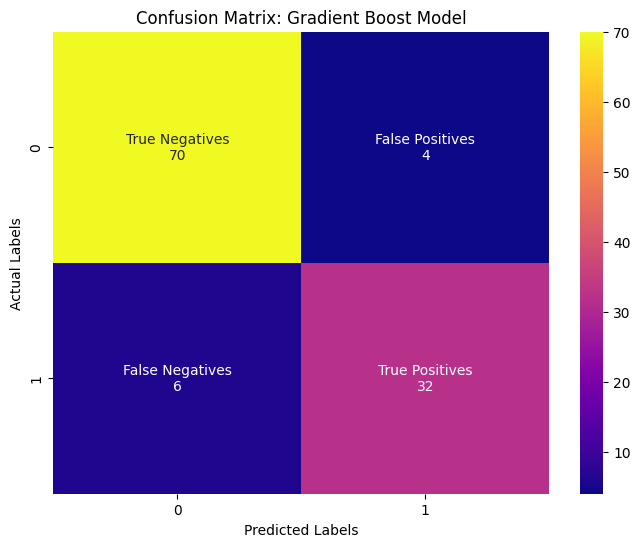

In [71]:
#Display confusion Matrix for smote model

#First initialize confusion matrix
cm = confusion_matrix(y_test, y_pred_gbc)

#Extract values: trust postives, trust negatives, etc
tn, fp, fn, tp = cm.ravel()

#Create custom labels
labels = np.asarray([
    [f"True Negatives\n{tn}", f"False Positives\n{fp}"],
    [f"False Negatives\n{fn}", f"True Positives\n{tp}"]
])

#Annote and customize heatmap
plt.figure(figsize=(8,6)) #Set figure size
sns.heatmap(cm, annot=labels, fmt='', cmap='plasma')
plt.title('Confusion Matrix: Gradient Boost Model')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

#Initialize class labels to further annotate graph
class_names = [0, 1]

#Initialize tick marks to line up class names appropriately
tick_marks = np.arange(len(class_names))

#Arrange the class labels (0 and 1)
plt.xticks(tick_marks + 0.5, class_names)
plt.yticks(tick_marks + 0.5, class_names, rotation=90) #Align Properly

#Display
plt.show()

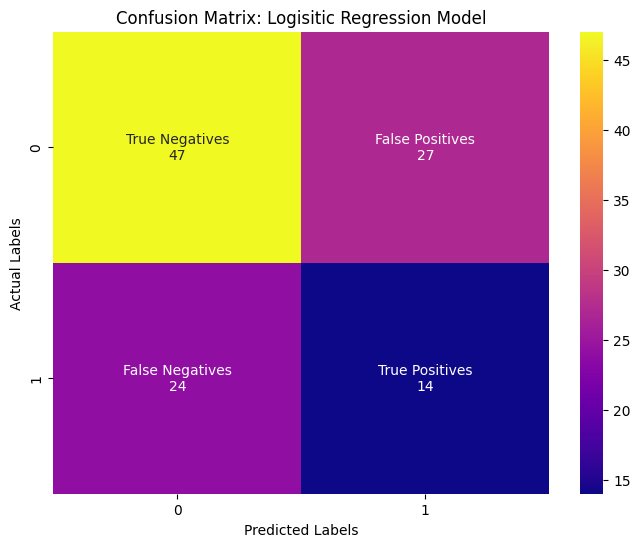

In [72]:
#Display confusion Matrix for smote model

#First initialize confusion matrix
cm = confusion_matrix(y_test, y_pred_log)

#Extract values: trust postives, trust negatives, etc
tn, fp, fn, tp = cm.ravel()

#Create custom labels
labels = np.asarray([
    [f"True Negatives\n{tn}", f"False Positives\n{fp}"],
    [f"False Negatives\n{fn}", f"True Positives\n{tp}"]
])

#Annote and customize heatmap
plt.figure(figsize=(8,6)) #Set figure size
sns.heatmap(cm, annot=labels, fmt='', cmap='plasma')
plt.title('Confusion Matrix: Logisitic Regression Model')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

#Initialize class labels to further annotate graph
class_names = [0, 1]

#Initialize tick marks to line up class names appropriately
tick_marks = np.arange(len(class_names))

#Arrange the class labels (0 and 1)
plt.xticks(tick_marks + 0.5, class_names)
plt.yticks(tick_marks + 0.5, class_names, rotation=90) #Align Properly

#Display
plt.show()